In [1]:
# User defined parameters
filepath = 'r3bs10epochs100weights.h5' # filepath of weights
r = 3 # Upscale Factor
num_images = 729 # number of testing images to benchmark on (<=729)
verbose = True

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


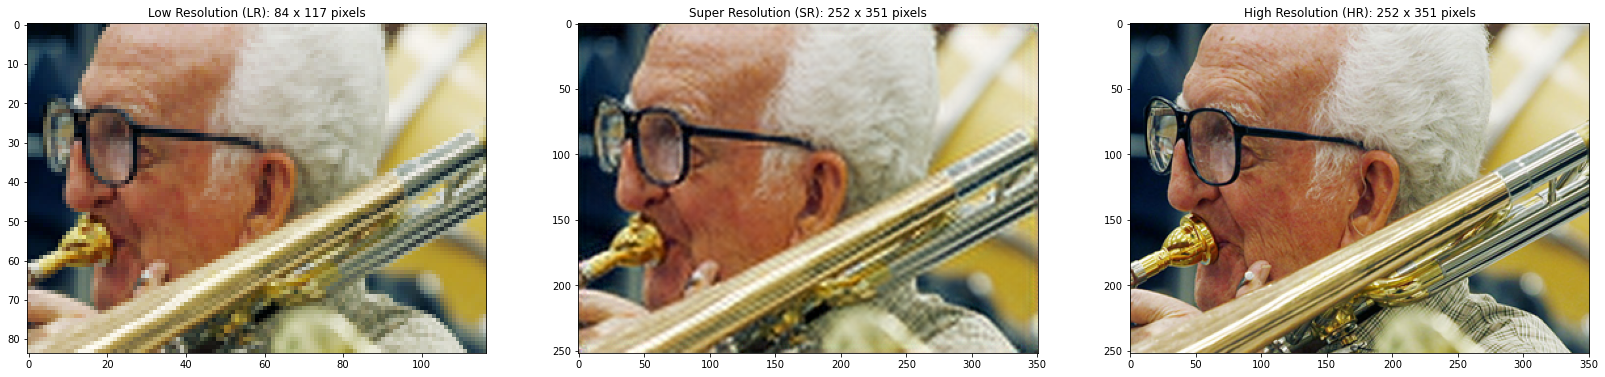

PSNR: 23.611664359860114


In [2]:
# Setup
import tensorflow as tf
import numpy as np
from tensorflow import keras
from espcn import espcn_model
from datagenerator import DataGenerator
from psnr import psnr
import matplotlib.pyplot as plt

# Compile model
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# Peak Signal-to-Noise Ratio
def PSNR(y_true, y_pred):
    max_pixel = 1.0
    return tf.image.psnr(y_true, y_pred, max_val=max_pixel)
model = espcn_model(r)
model.compile(optimizer=opt, loss='mse', metrics=[PSNR])
# Initialize generator
testing_generator = DataGenerator('LRbicx' + str(r), batch_size = 1, dictionary = "test")
# Load weights
model.load_weights(filepath)
# Verify that model is working correctly
lr, hr = testing_generator.__getitem__(0)
sr = model.predict(lr)
fig = plt.figure()
fig.set_size_inches(28, 28)
ax1 = fig.add_subplot(1,3,1)
ax1.set_title('Low Resolution (LR): ' + str(lr[0].shape[0]) + ' x ' + str(lr[0].shape[1]) + ' pixels')
ax1.imshow(lr[0])
ax2 = fig.add_subplot(1,3,2)
ax2.set_title('Super Resolution (SR): ' + str(sr[0].shape[0]) + ' x ' + str(sr[0].shape[1]) + ' pixels')
ax2.imshow(sr[0])
ax3 = fig.add_subplot(1,3,3)
ax3.set_title('High Resolution (HR): ' + str(hr[0].shape[0]) + ' x ' + str(hr[0].shape[1]) + ' pixels')
ax3.imshow(hr[0])
plt.show()
print("PSNR: " + str(psnr(sr[0], hr[0])))

In [7]:
average_psnr = 0
for i in range(0, num_images):
    lr, hr = testing_generator.__getitem__(i)
    sr = model.predict(lr)
    result = psnr(sr[0], hr[0])
    average_psnr += result
    if verbose:
        print('Image: ' + str(i) + ', PSNR: ' + str(result) + ', Average: ' + str(average_psnr/(i+1)))
print("Average PSNR: " + str(average_psnr/num_images))

Image: 0, PSNR: 31.724800255179236, Average: 31.724800255179236
Image: 1, PSNR: 26.039722628502155, Average: 28.882261441840697
Image: 2, PSNR: 18.29361633130671, Average: 25.352713071662702
Image: 3, PSNR: 23.551866321416902, Average: 24.90250138410125
Image: 4, PSNR: 23.304521576181443, Average: 24.58290542251729
Image: 5, PSNR: 21.837185438297055, Average: 24.12528542514725
Image: 6, PSNR: 25.339774418265435, Average: 24.298783852735564
Image: 7, PSNR: 26.693686496921664, Average: 24.598146683258825
Image: 8, PSNR: 21.978691967158497, Average: 24.307096159247678
Image: 9, PSNR: 24.13834647389436, Average: 24.290221190712348
Image: 10, PSNR: 34.220513374050945, Average: 25.192975025561314
Image: 11, PSNR: 23.11594454538109, Average: 25.019889152212958
Image: 12, PSNR: 25.44962020034648, Average: 25.05294538668477
Image: 13, PSNR: 20.389621096256082, Average: 24.71985079451129
Image: 14, PSNR: 23.797804493078406, Average: 24.65838104108243
Image: 15, PSNR: 17.65372192949509, Average: 